In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
from data_per_day import DataPerDay

In [2]:
train_dataset = DataPerDay.load("/home/nilm/data/merged_train_dataset.pickle").shuffle()
val_dataset = DataPerDay.load("/home/nilm/data/merged_val_dataset.pickle").shuffle()

In [3]:
dataset = train_dataset + val_dataset

In [4]:
# printea los nombres de los datasets usados
", ".join(list(dataset.differents_datasets().keys()))

'UTEFING_AG_TT, Dataport, ECO, REFIT, AMPds, UK-DALE, GeLaP, ENERTALK, REDD, GREEND, RAE, UTEFING_AA, SynD, MORED-WPILGT, combed, NILM-UY, DRED, DEDDIAG, iAWE, IDEAL'

In [5]:
# perapara una tabla latex con los `num_to_show` electrodomesticos mas usado
# con la cantidad de dias que aporta cada uno
num_to_show = 20
s = pd.Series(dataset.differents_elecs()).sort_values(ascending=False)
num_other = s.iloc[num_to_show:].sum()
s = s.iloc[:num_to_show]
s["Others"] = num_other
print(s.to_latex())

\begin{tabular}{lr}
\toprule
{} &       0 \\
\midrule
electric water heating appliance &  136856 \\
unknown                          &   77422 \\
fridge                           &   22073 \\
microwave                        &   16233 \\
air conditioner                  &   10007 \\
dish washer                      &    9707 \\
washing machine                  &    8499 \\
kettle                           &    4580 \\
electric vehicle                 &    1688 \\
Others                           &       0 \\
\bottomrule
\end{tabular}



In [6]:
# prepara una tabla latex con los datasets usados y su cantidad de dias
# que aporta cada uno
s = pd.Series(dataset.differents_datasets()).sort_values(ascending=False)
print(s.to_latex())

\begin{tabular}{lr}
\toprule
{} &       0 \\
\midrule
UTEFING\_AG\_TT &  135265 \\
Dataport      &   87311 \\
REFIT         &   34022 \\
UK-DALE       &   11722 \\
ECO           &    3321 \\
AMPds         &    3032 \\
SynD          &    2356 \\
UTEFING\_AA    &    2081 \\
ENERTALK      &    2056 \\
GREEND        &    1245 \\
GeLaP         &    1108 \\
MORED-WPILGT  &    1073 \\
RAE           &     909 \\
DRED          &     688 \\
NILM-UY       &     261 \\
REDD          &     246 \\
combed        &     184 \\
DEDDIAG       &     125 \\
iAWE          &      41 \\
IDEAL         &      19 \\
\bottomrule
\end{tabular}



In [7]:
dataset.dataperday_with_most_common_elecs(20).summary_elec_dataset(
    add_sum_column=True
).sort_values("sum")

dataset,AMPds,DEDDIAG,DRED,Dataport,ECO,ENERTALK,GREEND,GeLaP,IDEAL,MORED-WPILGT,...,RAE,REDD,REFIT,SynD,UK-DALE,UTEFING_AA,UTEFING_AG_TT,combed,iAWE,sum
elec,,,,,,,,,,,,,,,,,,,,,
electric vehicle,0,0,0,1688,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1688
kettle,0,0,0,0,216,0,6,117,0,0,...,0,0,3970,179,83,0,0,0,0,4580
washing machine,0,0,27,4888,122,196,27,90,0,66,...,43,0,2830,159,33,0,0,0,0,8499
dish washer,0,46,0,5311,53,0,292,0,0,0,...,0,18,2908,169,885,0,0,0,0,9707
air conditioner,0,0,0,7873,0,0,0,0,0,0,...,0,8,0,0,0,2081,0,0,0,10007
microwave,0,0,107,10293,112,58,5,26,1,0,...,0,32,3923,179,1440,0,0,0,0,16233
fridge,726,0,149,17107,768,416,143,1,0,429,...,120,27,1782,179,116,0,0,0,24,22073
unknown,2306,79,405,38581,2050,1386,772,874,18,578,...,746,161,18609,1491,9165,0,0,184,17,77422
electric water heating appliance,0,0,0,1570,0,0,0,0,0,0,...,0,0,0,0,0,0,135265,0,0,136856


In [8]:
dataset.differents_elecs()

Counter({'electric water heating appliance': 136856,
         'unknown': 77422,
         'air conditioner': 10007,
         'fridge': 22073,
         'microwave': 16233,
         'washing machine': 8499,
         'dish washer': 9707,
         'kettle': 4580,
         'electric vehicle': 1688})

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
/tmp/ipykernel_2621981/1712164491.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


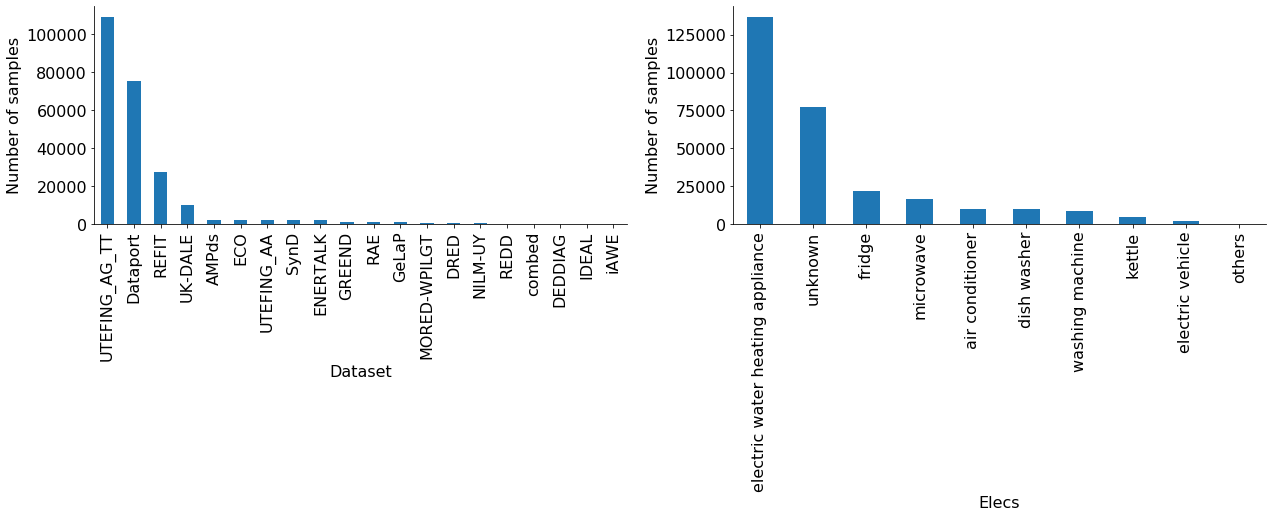

In [9]:
# ideas para el plot "lindo"
# https://towardsdatascience.com/an-introduction-to-making-scientific-publication-plots-with-python-ea19dfa7f51e
from pylab import cm

colors = cm.get_cmap("tab10", 2)
plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = "normal"

fig, ax = plt.subplots(1, 2, figsize=(21, 4))
train_dataset.plot.bar_datasets(ax=ax[0])

dataset.plot.bar_elecs(ax=ax[1], most_common=15)

for ax_ in ax:
    ax_.set_ylabel("Number of samples")
    ax_.grid(False)
    ax_.spines["right"].set_visible(False)
    ax_.spines["top"].set_visible(False)

fig.tight_layout()
# fig.savefig("figures/datasets_elecs_barplot.svg")

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


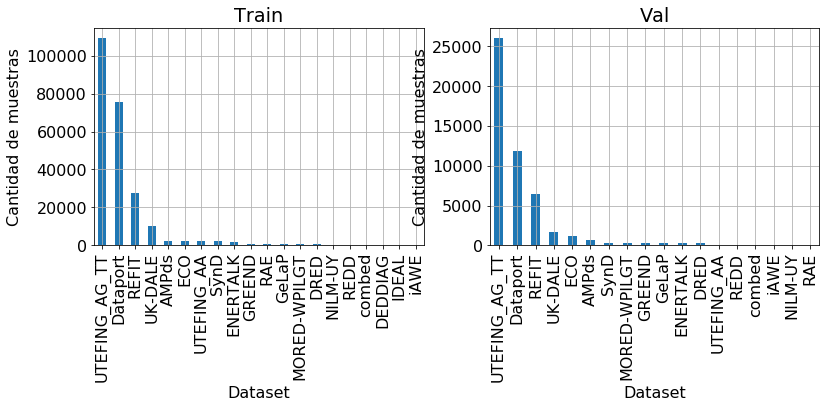

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
train_dataset.plot.bar_datasets(ax=ax[0], title="Train")
val_dataset.plot.bar_datasets(ax=ax[1], title="Val")

In [11]:
train_dataset.summary_elec_dataset(20)

dataset,AMPds,DEDDIAG,DRED,Dataport,ECO,ENERTALK,GREEND,GeLaP,IDEAL,MORED-WPILGT,NILM-UY,RAE,REDD,REFIT,SynD,UK-DALE,UTEFING_AA,UTEFING_AG_TT,combed,iAWE
elec,,,,,,,,,,,,,,,,,,,,
air conditioner,0,0,0,6270,0,0,0,0,0,0,40,0,8,0,0,0,2031,0,0,0
dish washer,0,46,0,4211,53,0,162,0,0,0,25,0,18,2489,0,885,0,0,0,0
electric vehicle,0,0,0,1527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
electric water heating appliance,0,0,0,1570,0,0,0,0,0,0,21,0,0,0,0,0,0,109235,0,0
fridge,726,0,149,15112,435,300,143,1,0,309,86,120,7,994,179,116,0,0,0,0
kettle,0,0,0,0,127,0,6,48,0,0,9,0,0,3970,179,83,0,0,0,0
microwave,0,0,107,9028,112,58,0,26,1,0,57,0,25,2984,179,1325,0,0,0,0
unknown,1580,79,205,33381,1483,1361,609,677,18,367,0,726,143,14685,1312,7635,0,0,159,17
washing machine,0,0,0,4362,0,97,15,84,0,66,0,43,0,2441,159,33,0,0,0,0


In [12]:
train_dataset.differents_elecs()

Counter({'electric water heating appliance': 110826,
         'unknown': 64437,
         'air conditioner': 8349,
         'fridge': 18677,
         'microwave': 13902,
         'washing machine': 7300,
         'dish washer': 7889,
         'kettle': 4422,
         'electric vehicle': 1527})

In [13]:
val_dataset.differents_elecs()

Counter({'dish washer': 1818,
         'electric water heating appliance': 26030,
         'air conditioner': 1658,
         'washing machine': 1199,
         'fridge': 3396,
         'unknown': 12985,
         'microwave': 2331,
         'electric vehicle': 161,
         'kettle': 158})

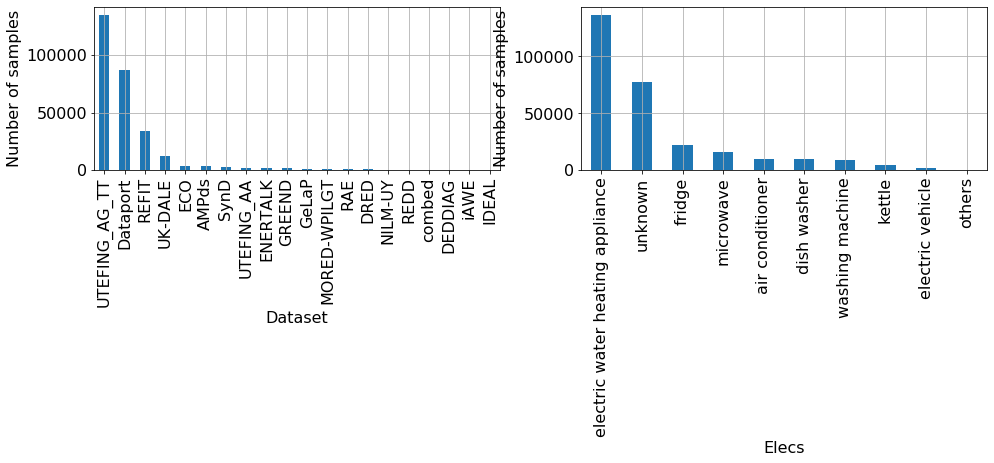

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 3))
dataset.plot.bar_elecs(ax=ax[1], most_common=20)
dataset.plot.bar_datasets(ax=ax[0])
for ax_i in ax:
    ax_i.set_ylabel("Number of samples")
# fig.savefig("figures/num_samples_datasets_elecs.svg")

matplotlib.axes._subplots.AxesSubplot

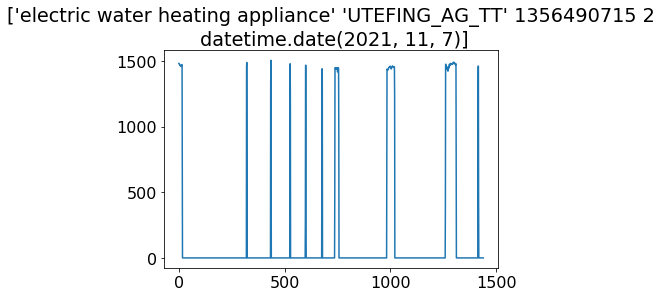

In [15]:
type(
    dataset.get_by(
        elec="electric water heating appliance", dataset="UTEFING_AG_TT"
    ).plot.sample(1)
)

In [16]:
dataset.differents_datasets()

Counter({'UTEFING_AG_TT': 135265,
         'Dataport': 87311,
         'ECO': 3321,
         'REFIT': 34022,
         'AMPds': 3032,
         'UK-DALE': 11722,
         'GeLaP': 1108,
         'ENERTALK': 2056,
         'REDD': 246,
         'GREEND': 1245,
         'RAE': 909,
         'UTEFING_AA': 2081,
         'SynD': 2356,
         'MORED-WPILGT': 1073,
         'combed': 184,
         'NILM-UY': 261,
         'DRED': 688,
         'DEDDIAG': 125,
         'iAWE': 41,
         'IDEAL': 19})

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


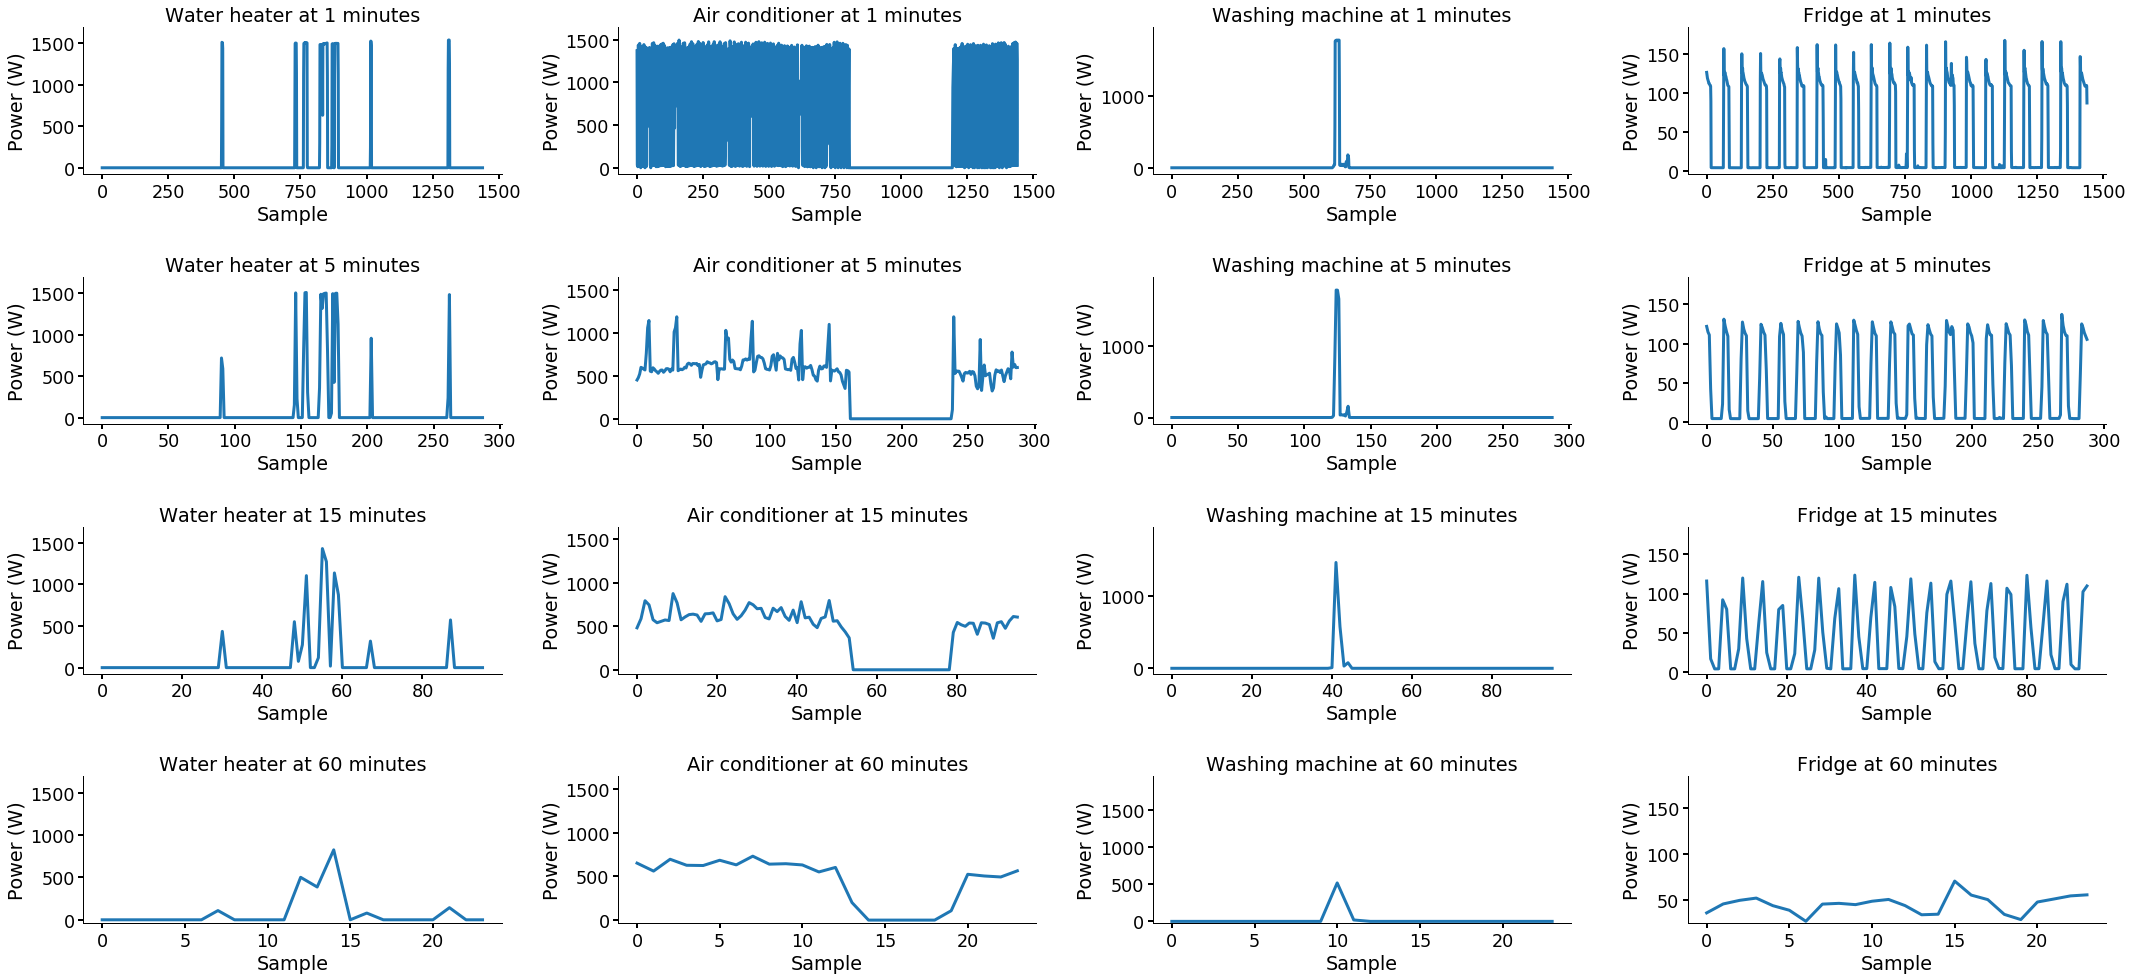

In [17]:
import seaborn as sns  # Statistical plotting

# sns.set_style("white")
sns.set_context("paper", font_scale=2)


d = dataset.get_by(elec="electric water heating appliance", dataset="UTEFING_TT")[3]

elecs = {
    "electric water heating appliance": 11,
    "air conditioner": 2,
    "washing machine": 12,
    "fridge": 0,
}

samples_periods = [60, 300, 900, 3600]
fig, ax = plt.subplots(
    len(samples_periods),
    len(elecs),
    figsize=(7.5 * len(elecs), 3.5 * len(samples_periods)),
)

for i, (elec, index_plot) in enumerate(elecs.items()):
    d_elec = dataset.drop_by(dataset="Dataport").get_by(elec=elec)
    for j, sample_period in enumerate(samples_periods):
        d_elec.resample(sample_period)[sample_period].plot.sample(
            index_plot, ax=ax[j, i], linewidth=3.0
        )

        elec = "water heater" if elec == "electric water heating appliance" else elec
        ax[j, i].set_title(f"{elec.capitalize()} at {sample_period//60} minutes")

        ax[j, i].set_ylim((None, d_elec[index_plot].X.max() * 1.1))

        ax[j, i].spines["right"].set_visible(False)
        ax[j, i].spines["top"].set_visible(False)
        ax[j, i].xaxis.set_tick_params(which="major", size=5, width=2, direction="out")
        ax[j, i].yaxis.set_tick_params(which="major", size=5, width=2, direction="out")

        ax[j, i].set_ylabel("Power (W)")
        ax[j, i].set_xlabel("Sample")

fig.tight_layout()
fig.subplots_adjust(hspace=0.7)
# fig.savefig("figures/elecs_at_different_sample_period.svg")

# Raw data

In [18]:
X = dataset.X
y = dataset.y
agg = dataset.agg

In [19]:
X.shape, y.shape, agg.shape

((287065, 1440), (287065, 5), (287065, 1440))

In [20]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.434e+03, 1.431e+03,
        1.426e+03],
       [6.000e+00, 6.000e+00, 6.000e+00, ..., 6.000e+00, 6.000e+00,
        6.000e+00],
       [1.481e+03, 1.480e+03, 1.478e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)

In [21]:
y

array([['electric water heating appliance', 'UTEFING_AG_TT', 5064270617,
        2, datetime.date(2021, 7, 25)],
       ['unknown', 'Dataport', 7901, 8, datetime.date(2018, 4, 13)],
       ['electric water heating appliance', 'UTEFING_AG_TT', 1356490715,
        2, datetime.date(2021, 11, 7)],
       ...,
       ['microwave', 'REFIT', 6, 7, datetime.date(2014, 9, 21)],
       ['electric water heating appliance', 'UTEFING_AG_TT', 2039121746,
        2, datetime.date(2021, 2, 24)],
       ['electric water heating appliance', 'UTEFING_AG_TT', 9203810813,
        2, datetime.date(2021, 6, 27)]], dtype=object)

In [22]:
agg

array([[ 756.    ,  756.    ,  756.    , ..., 2196.    , 2196.    ,
        2196.    ],
       [ 506.    ,  540.    ,  643.    , ...,  399.    ,  404.    ,
         287.    ],
       [1680.    , 1680.    , 1680.    , ...,  116.    ,  116.    ,
         116.    ],
       ...,
       [ 601.6667,  595.5   ,  711.6   , ...,  688.3   ,  703.4   ,
         700.6   ],
       [1112.    , 1112.    , 1112.    , ...,  308.    ,  308.    ,
         308.    ],
       [  76.    ,   76.    ,   76.    , ...,   60.    ,   60.    ,
          60.    ]], dtype=float32)